In [14]:
# '''Simple Investment Strategy'''

#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [35]:
df = pd.read_csv('S&P 500 Enhanced Data 2018 to 2022.csv')
df.index = pd.to_datetime(df['Date'])
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Close,High-Low,Open-Close
Date,,,,,,,,,,
2021-12-31,12/31/2021,4766.18,4775.21,4786.83,4765.75,NaN,-0.26%,4794.23,21.08,-19.02
2021-12-30,12/30/2021,4778.73,4794.23,4808.93,4775.33,NaN,-0.30%,4788.64,33.60,5.59
2021-12-29,12/29/2021,4793.06,4788.64,4804.06,4778.08,NaN,0.14%,4795.49,25.98,-6.85
2021-12-28,12/28/2021,4786.36,4795.49,4807.02,4780.04,NaN,-0.10%,4733.99,26.98,61.50
2021-12-27,12/27/2021,4791.19,4733.99,4791.49,4733.99,NaN,1.38%,4703.96,57.50,30.03


In [36]:
# Set the date as the index

df =df.drop(['Date'], axis='columns')

df.head()

,Price,Open,High,Low,Vol.,Change %,Close,High-Low,Open-Close
Date,,,,,,,,,
2021-12-31,4766.18,4775.21,4786.83,4765.75,NaN,-0.26%,4794.23,21.08,-19.02
2021-12-30,4778.73,4794.23,4808.93,4775.33,NaN,-0.30%,4788.64,33.60,5.59
2021-12-29,4793.06,4788.64,4804.06,4778.08,NaN,0.14%,4795.49,25.98,-6.85
2021-12-28,4786.36,4795.49,4807.02,4780.04,NaN,-0.10%,4733.99,26.98,61.50
2021-12-27,4791.19,4733.99,4791.49,4733.99,NaN,1.38%,4703.96,57.50,30.03


In [37]:
#store the variables
X = df[['Open-Close','High-Low','Close']]
X.head()

,Open-Close,High-Low,Close
Date,,,
2021-12-31,-19.02,21.08,4794.23
2021-12-30,5.59,33.60,4788.64
2021-12-29,-6.85,25.98,4795.49
2021-12-28,61.50,26.98,4733.99
2021-12-27,30.03,57.50,4703.96


In [38]:
#store the target variable in y 
#if tomorrow's close is greater than today's close, then y=1, else y=0
#1 for buying
y = np.where(df.Close.shift(-1) > df.Close, 1, 0)
y

array([0, 1, 0, ..., 0, 0, 0])

In [39]:
df.shape

(1007, 9)

In [40]:
#split the data into train and test manual split 
split_percentage = 0.9
row = int(df .shape[0] * split_percentage)

#train data
X_train = X[:row] 
y_train = y[:row]

#test data
X_test = X[row:] #row to end
y_test = y[row:] #row to end

In [41]:
X_train

,Open-Close,High-Low,Close
Date,,,
2021-12-31,-19.02,21.08,4794.23
2021-12-30,5.59,33.60,4788.64
2021-12-29,-6.85,25.98,4795.49
2021-12-28,61.50,26.98,4733.99
2021-12-27,30.03,57.50,4703.96
...,...,...,...
2018-06-05,6.79,13.10,2741.67
2018-06-04,22.97,8.62,2718.70
2018-06-01,-2.28,18.23,2720.98


In [42]:
X_test

,Open-Close,High-Low,Close
Date,,,
2018-05-29,-18.49,33.86,2723.60
2018-05-25,-7.34,12.37,2730.94
2018-05-24,16.96,24.59,2713.98
2018-05-23,-24.36,23.79,2738.34
2018-05-22,12.39,20.36,2725.95
...,...,...,...
2018-01-09,8.48,11.28,2742.67
2018-01-08,11.34,10.91,2731.33
2018-01-05,12.02,15.53,2719.31


In [44]:
#import the library for machine learning model Support Vector Classifier
from sklearn.svm import SVC

#Create the object of the model
model = SVC()

#train the model
model.fit(X_train[['Open-Close','High-Low']], y_train)

SVC()

In [45]:
#check the accuracy of the model on the train data
model.score(X_train[['Open-Close','High-Low']], y_train)

0.6258278145695364

In [46]:
#check the accuracy of the model on the test data
model.score(X_test[['Open-Close','High-Low']], y_test)

0.5742574257425742

In [48]:
#Make the predictions 
df['Predictions'] = model.predict(X[['Open-Close','High-Low']])
df['Predictions'].head(25)

Date
2021-12-31    0
2021-12-30    0
2021-12-29    0
2021-12-28    0
2021-12-27    1
2021-12-23    0
2021-12-22    0
2021-12-21    1
2021-12-20    0
2021-12-17    0
2021-12-16    1
2021-12-15    1
2021-12-14    0
2021-12-13    0
2021-12-10    0
2021-12-09    0
2021-12-08    0
2021-12-07    1
2021-12-06    0
2021-12-03    1
2021-12-02    1
2021-12-01    1
2021-11-30    1
2021-11-29    0
2021-11-26    1
Name: Predictions, dtype: int64

In [53]:
#Calculate the daily returns
df['Return'] = df['Close'].pct_change(1)

#Show the return
# df['Return'].head(25)

In [50]:
#Calculate the strategy returns
#shifting the prediction by one for getting the returns for that day
df['Strategy_Return'] = df['Predictions'].shift(1) * df['Return']


In [51]:
#show the strategy returns
df[['Return','Strategy_Return']].head(25)

,Return,Strategy_Return
Date,,
2021-12-31,NaN,NaN
2021-12-30,-0.001166,-0.000000
2021-12-29,0.001430,0.000000
2021-12-28,-0.012825,-0.000000
2021-12-27,-0.006343,-0.000000
2021-12-23,-0.011395,-0.011395
2021-12-22,-0.011913,-0.000000
2021-12-21,-0.001536,-0.000000
2021-12-20,0.014081,0.014081


In [54]:
#Calculate the cumulative strategy returns
df['Cumulative_Returns']= df['Return'].cumsum()

#Calculate the cumulative strategy returns
df['Cumulative_Strategy']= df['Strategy_Return'].cumsum()


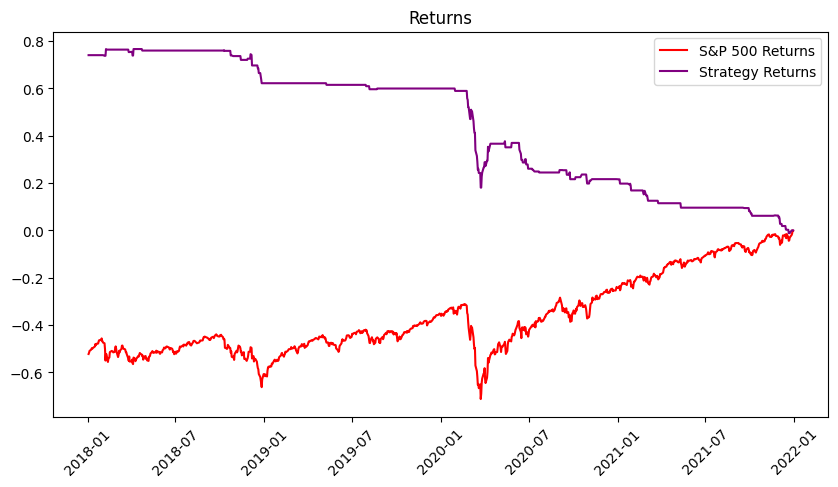

In [56]:
#Visualize the cumulative strategy returns
plt.figure(figsize=(10,5))
plt.title ('Returns')
plt.plot(df['Cumulative_Returns'], color='red', label='S&P 500 Returns')
plt.plot(df['Cumulative_Strategy'], color='purple', label='Strategy Returns')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [57]:
#print the returns
print('The S&P 500 returns are: ', df['Cumulative_Returns'][-1]*100,'%')
print('The Strategy returns are: ', df['Cumulative_Strategy'][-1]*100,'%')

The S&P 500 returns are:  -52.189145927500434 %
The Strategy returns are:  74.01688169386985 %


In [58]:
#strategy returns are better than the S&P 500 returns